In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import enum
import numpy as np

class CellType(enum.IntEnum):
    HSC = 0
    MPP1 = 1
    MPP2 = 2
    MPP3 = 3
    MPP4 = 4
    MPP5 = 5
    CMP = 6
    CLP = 7
    MEP = 8
    GMP = 9
    Erythroblast1 = 10
    Erythroblast2 = 11
    Erythroblast3 = 12
    Erythroblast4 = 13
    Erythroblast5 = 14
    Erythroblast6 = 15
    Erythroblast7 = 16
    Erythroblast8 = 17
    RBC = 18
    Myeloblast1 = 19
    Myeloblast2 = 20
    Myeloblast3 = 21
    Myeloblast4 = 22
    Myeloblast5 = 23
    Myeloblast6 = 24
    Myeloblast7 = 25
    Myeloid = 26
    Megakaryocyte = 27
    Platelet = 28
    Lymphocyte1 = 29
    Lymphocyte2 = 30
    Lymphocyte3 = 31
    Lymphocyte4 = 32
    Lymphocyte5 = 33
    Lymphocyte6 = 34
    Lymphocyte7 = 35
    Lymphocyte8 = 36
    Lymphocyte9 = 37
    Lymphocyte10 = 38
    Bcell = 39
    STROMA = 40

HSC = [CellType.HSC] 
MPP = [CellType.MPP1, CellType.MPP2, CellType.MPP3, CellType.MPP4, CellType.MPP5]
RPP = [CellType.CMP, CellType.CLP, CellType.MEP, CellType.GMP]


In [8]:
# df = pd.read_csv('../data/clonal_mot_all_steps.csv')
df = pd.read_csv('../data/clonal_sm_all_steps.csv')

df


step  cell_type         x         y      dx      dy  clone_id  \
0            0          0  480.6147  106.8818  0.0000  0.0000         0   
1            0          0  183.5834  391.5754  0.0000  0.0000         1   
2            0          0  366.5807  189.7064  0.0000  0.0000         2   
3            0         40   64.4671  145.9373  0.0000  0.0000        -1   
4            0         40  407.4739   96.5971  0.0000  0.0000        -1   
...        ...        ...       ...       ...     ...     ...       ...   
2309113  50000         38  489.9995  482.5702  0.0197  0.4242         1   
2309114  50000         39  485.0446  496.0000 -0.4449  0.4418         1   
2309115  50000         36  496.0000  485.3370 -0.1993 -0.1269         1   
2309116  50000         39  490.5433  496.0000 -0.0570 -0.0273         1   
2309117  50000         39  484.3565  484.9366  0.1812  0.0592         1   

         vessel_neighbourhood  status  cell_id  
0                           0       0        0  
1                           0       0        1  
2                           0       0        2  
3                           0       0        3  
4                           0       0        4  
...                       ...     ...      ...  
2309113                     0       0    27433  
2309114                     0       0    27434  
2309115                     0       0    27435  
2309116                     0       0    27436  
2309117                     0       0    27437  

[2309118 rows x 10 columns]

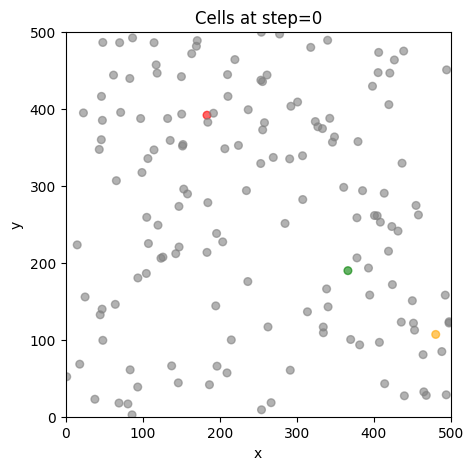

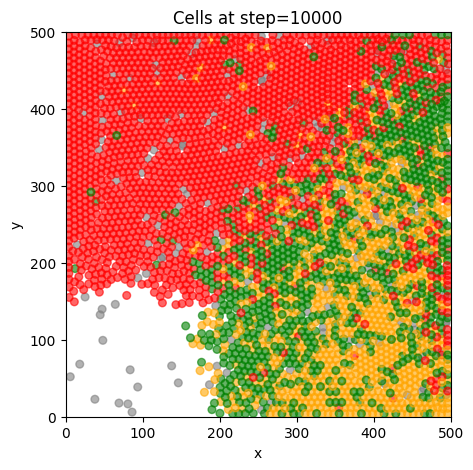

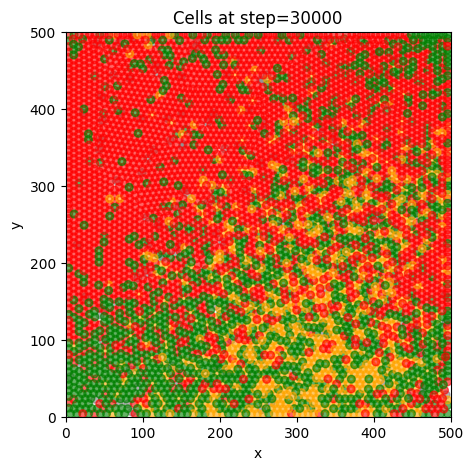

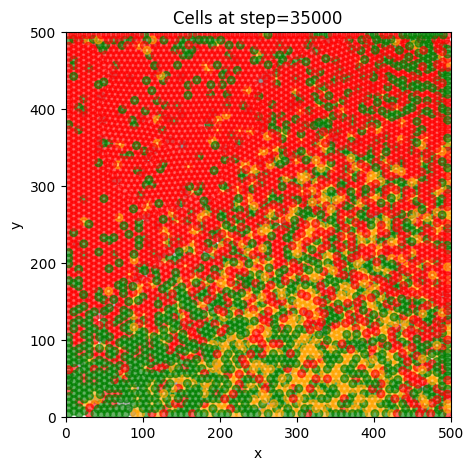

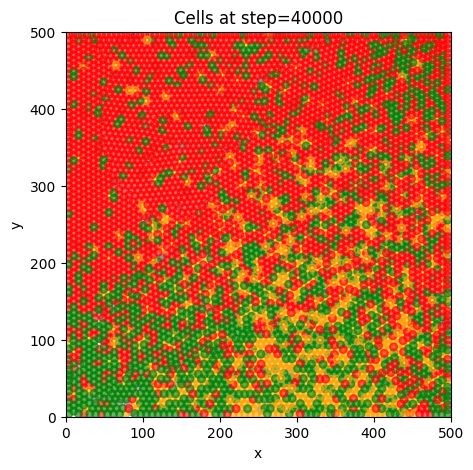

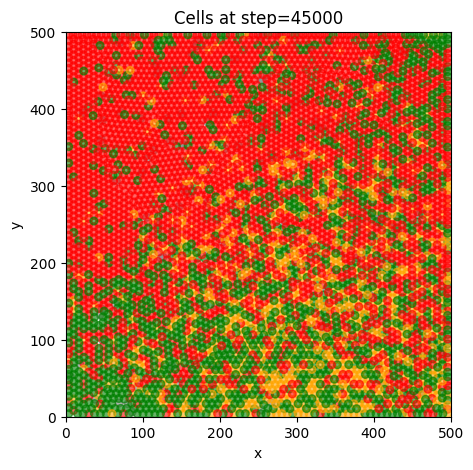

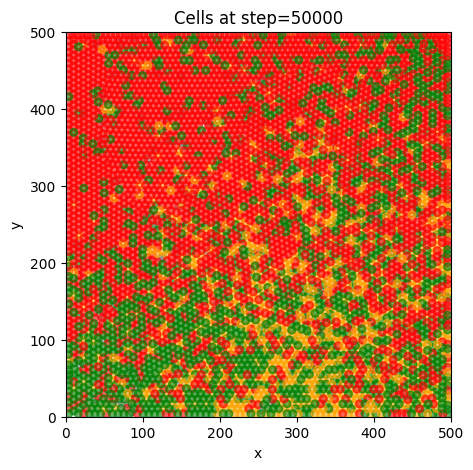

In [10]:
colors = ['orange', 'red', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'] # ten colors

def get_step_data(step: int):
    d = df[df.step == step].copy()
    return d

step_data = get_step_data(df.step.max())

def plot_cells(step_data: pd.DataFrame):
    plt.figure(figsize=(5, 5), dpi=100)
    ax = plt.gca()
    for _, row in step_data.iterrows():
        color = colors[row['clone_id'].astype(int)] if row['clone_id'] >= 0 else 'gray'
        circle = plt.Circle((row['x'], row['y']), 5, color=color, alpha=0.6)
        ax.add_patch(circle)

    ax.set_xlim(0, 500)
    ax.set_ylim(0, 500)
    ax.set_aspect('equal')
    plt.title(f'Cells at step={step_data.step.values[0]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()



step_points = list(range(0, 50001, 5000))
for i in step_points:
    plot_cells(get_step_data(i))


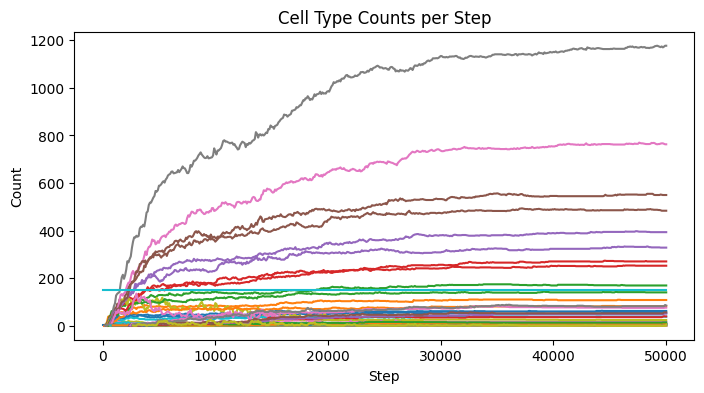

In [11]:
counts = df.groupby('step')['cell_type'].value_counts().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=counts, x='step', y='count', hue='cell_type', legend=False, palette='tab10')
plt.title('Cell Type Counts per Step')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

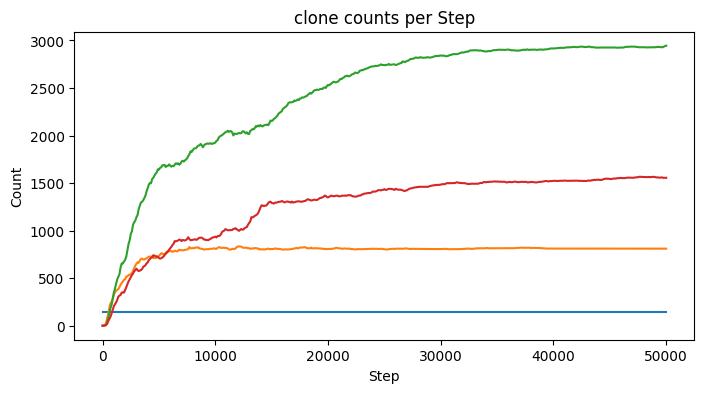

In [12]:

counts = df.groupby('step')['clone_id'].value_counts().reset_index()


plt.figure(figsize=(8, 4))
sns.lineplot(data=counts, x='step', y='count', hue='clone_id', legend=False, palette='tab10')
plt.title('clone counts per Step')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

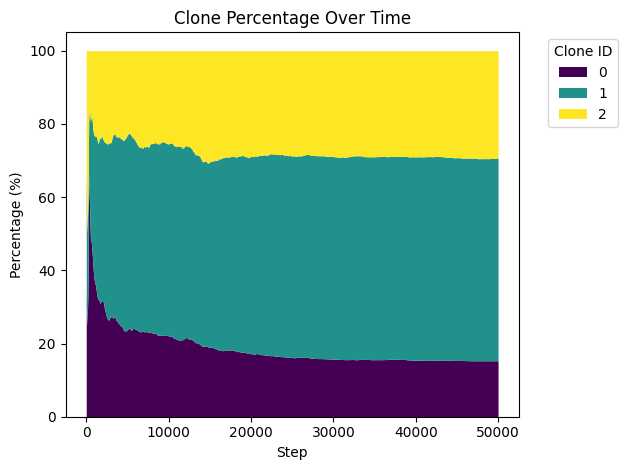

In [13]:
# Step 1: Normalize counts to percentage per step
counts = df.groupby('step')['clone_id'].value_counts().reset_index()
counts = counts[counts['clone_id'] >= 0]
counts['percentage'] = counts.groupby('step')['count'].transform(lambda x: 100 * x / x.sum())

# Step 2: Pivot the data for area plot
area_df = counts.pivot(index='step', columns='clone_id', values='percentage').fillna(0)

# # Step 3: Plot as area plot
area_df.plot.area(colormap='viridis', linewidth=0)
plt.ylabel('Percentage (%)')
plt.xlabel('Step')
plt.title('Clone Percentage Over Time')
plt.legend(title='Clone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()